<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Python Assignment</h4>


________________________________________________________________________________________________________________________________

In [1]:
# import required packages

import numpy as np
import matplotlib.pyplot as plt

# Q1: SVD for Compression (35 points)

One application of Singular Value Decomposition is lossy image compression. In this question, we want to compress BMP images using SVD. BMP images are not compressed by default and the pixel information is stored in rather a simple format. Colored BMP files are composed of three matrices of size $n × m$ where $n$ and $m$ are the height and width of the image, respectively. Each matrix corresponds to one of the three colors Red, Green, and Blue. Each entry of these matrices is a number between 0 and 255 that specifies the intensity of the corresponding color. The final array is hence a 3D array of size $n × m × 3$.
To open BMP files in Python, you can use the `imread` function from `matplotlib.image` library and to show the image, you can use the `imshow` function from `matplotlib.pyplot` library.

### 1.1 Image display  (2.5 points)
Choose two arbitrary BMP files (it is recommended to use different subjects and sizes) and load it into a `numpy` array using the `imread` function. Then, show each image.
Apply the following steps to each of the two images and display the results.

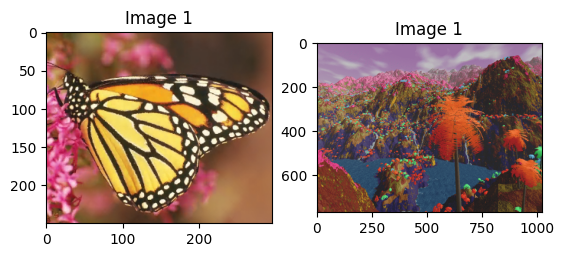

In [2]:
# Loading images
img_1 = plt.imread('img1.bmp')
img_2 = plt.imread('img2.bmp')

# Displaying the images
plt.subplot(1,2,1)
plt.imshow(img_1)
plt.title('Image 1')
plt.subplot(1,2,2)
plt.imshow(img_2)
plt.title('Image 1')
plt.show()

### 1.2 Channel Separation (2.5 points)
Separate three channels corresponding to red, green, and blue colors.
``` Python
r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]
```

In [3]:
img_1_r = img_1[:,:,0]
img_1_g = img_1[:,:,1]
img_1_b = img_1[:,:,2]

img_2_r = img_2[:,:,0]
img_2_g = img_2[:,:,1]
img_2_b = img_2[:,:,2]

### 1.3 Singular Value Decomposition (10 points)
Using appropriate libraries, calculate the SVD decomposition of each of the arrays.
$$
A = U \Sigma V^T
$$
where $A$ is the original array, $U$ is an $n × n$ unitary matrix, $\Sigma$ is an $n × m$ rectangular diagonal matrix with non-negative real numbers on the diagonal, and $V$ is an $m × m$ unitary matrix.

In [4]:
img_1_r_U, img_1_r_S, img_1_r_VT = np.linalg.svd(img_1_r)
img_1_g_U, img_1_g_S, img_1_g_VT = np.linalg.svd(img_1_g)
img_1_b_U, img_1_b_S, img_1_b_VT = np.linalg.svd(img_1_b)

img_2_r_U, img_2_r_S, img_2_r_VT = np.linalg.svd(img_2_r)
img_2_g_U, img_2_g_S, img_2_g_VT = np.linalg.svd(img_2_g)
img_2_b_U, img_2_b_S, img_2_b_VT = np.linalg.svd(img_2_b)

### 1.4 Compression (10 points)
Since eigenvalues in the decomposition are sorted in descending order, we can approximate the original array by keeping only the first $k$ columns of $U$, first $k$ rows and columns of $\Sigma$, and first $k$ rows of $V^T$.
Select $k$ to be 5, 10, 50, 100 and 250 and approximate the original array using the truncated SVD. Show the approximated image titled with the value of $k$.

Reconstrunctiong Image 1 :


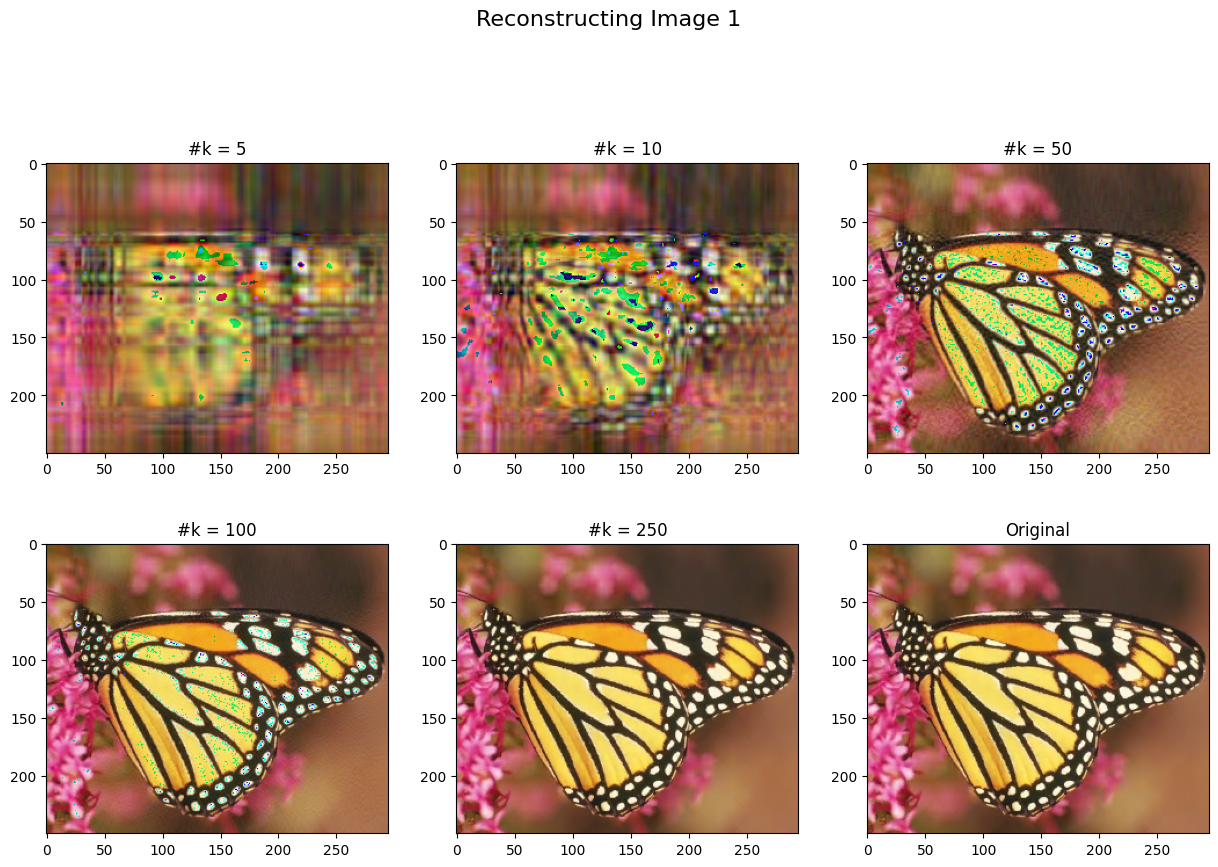



 Reconstructing Image 2 :


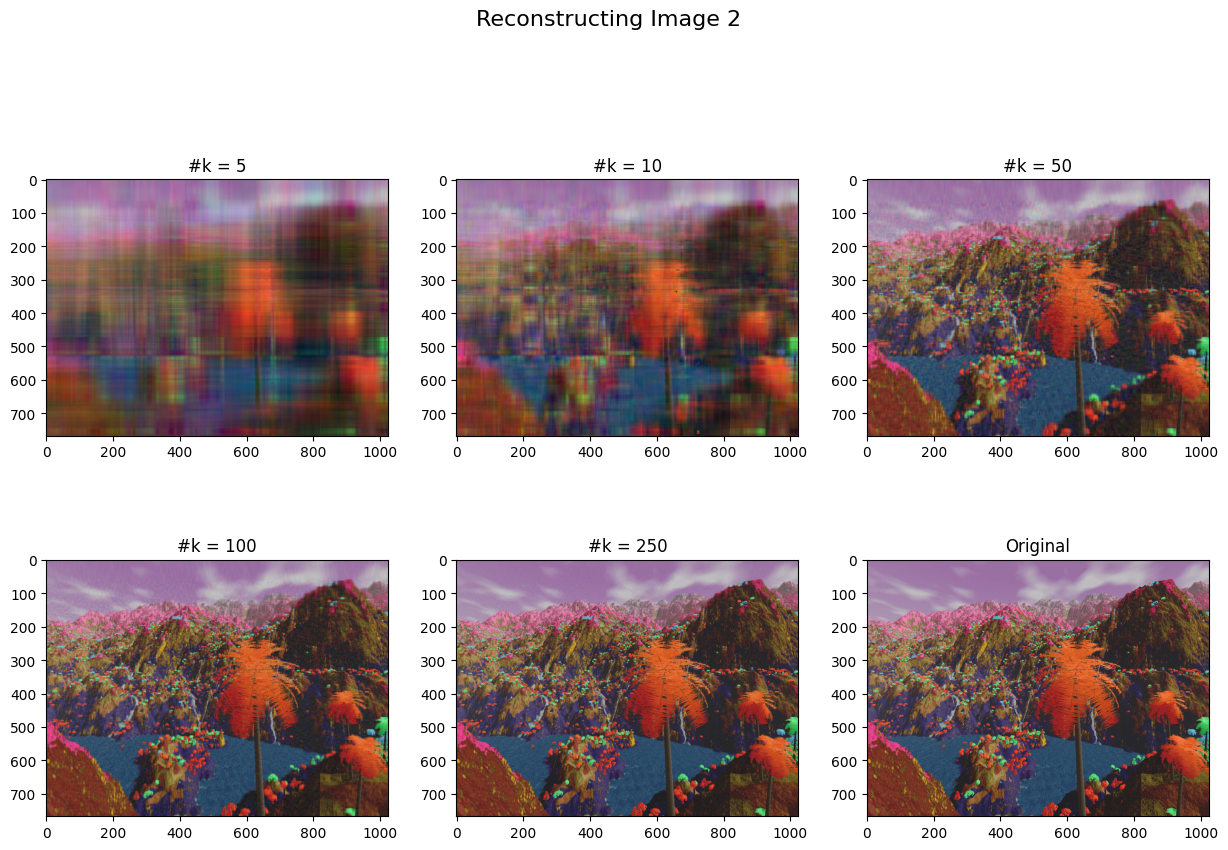

In [8]:
def compress(U, S, VT, k):
    new_U = U[:,0:k]
    new_S = np.diag(S)[0:k,0:k]
    new_VT = VT[0:k,:]

    img = new_U @ new_S @ new_VT

    return img

def show_compressed_imgs(img_num):

    k_range = [5, 10, 50, 100, 250]
    fig = plt.figure()
    plt.rcParams['figure.figsize'] = (15,14)
    fig.suptitle('Reconstructing Image '+str(img_num), fontsize=16)

    for k in k_range :
        if img_num == 1:
            comp_img_r = compress(img_1_r_U, img_1_r_S, img_1_r_VT, k)
            comp_img_g = compress(img_1_g_U, img_1_g_S, img_1_g_VT, k)
            comp_img_b = compress(img_1_b_U, img_1_b_S, img_1_b_VT, k)
        elif img_num == 2:
            comp_img_r = compress(img_2_r_U, img_2_r_S, img_2_r_VT, k)
            comp_img_g = compress(img_2_g_U, img_2_g_S, img_2_g_VT, k)
            comp_img_b = compress(img_2_b_U, img_2_b_S, img_2_b_VT, k)

        result = np.zeros((comp_img_r.shape[0], comp_img_r.shape[1], 3), dtype='uint8')
        result[:,:,0] = comp_img_r
        result[:,:,1] = comp_img_g
        result[:,:,2] = comp_img_b

        plt.subplot(3,3,k_range.index(k)+1)
        plt.imshow(result)
        plt.title('#k = ' + str(k))

    plt.subplot(3,3,6)
    if img_num == 1 :
        plt.imshow(img_1)
    elif img_num == 2:
        plt.imshow(img_2)
    plt.title('Original')

# Reconstructing the first image
print("Reconstrunctiong Image 1 :")
show_compressed_imgs(1)
plt.show()
# Reconstructing the second image
print("\n\n Reconstructing Image 2 :")
show_compressed_imgs(2)
plt.show( )

<h3> <font color="green"> Explaination </font> </h3>

It can be clearly seen that with more number of singular values and singular vectors (increasing k), we can reconstruct the images with more accuracy and better quality,

### 1.5 Compression Factor (10 points)
It seems that no compression is done since the size of the approximated array is the same as the original array. However, there is no need to store $U$ and $V$ matrices. Instead, we can store $\Sigma$ and two other matrices of size $n × k$ and $m × k$. Hence, we can compress the image by a factor of $\frac{nm}{k(n+m+1)}$. Calculate the compression factor for each value of $k$ and display the results in a table.

In [12]:
def calc_comp_factor(img_num):

    if img_num == 1 :
        m, n, _ = img_1.shape
    elif img_num == 2:
        m, n, _ = img_2.shape

    k_range = [5, 10, 50, 100, 250]
    comp_factor = []
    for k in k_range :
        f = (n*m) / (k*(n+m+1))
        comp_factor.append(f)

    return comp_factor

def print_table(data, title):
    k_range = [5, 10, 50, 100, 250]

    print('******* \t Image ', title, ' compression factos \t\t ******* \n')
    print('\t k \t\t compression factor')
    print('\t ___________________________________')
    for i in range(5):
        print('\t', k_range[i], '\t\t', data[i])
    print("\n****************************************************************\n")

comp_factor_img1 = calc_comp_factor(1)
comp_factor_img2 = calc_comp_factor(2)
print_table(comp_factor_img1, 1)
print_table(comp_factor_img2, 2)

******* 	 Image  1  compression factos 		 ******* 

	 k 		 compression factor
	 ___________________________________
	 5 		 27.014652014652015
	 10 		 13.507326007326007
	 50 		 2.7014652014652016
	 100 		 1.3507326007326008
	 250 		 0.5402930402930403

****************************************************************

******* 	 Image  2  compression factos 		 ******* 

	 k 		 compression factor
	 ___________________________________
	 5 		 87.72247629670943
	 10 		 43.861238148354715
	 50 		 8.772247629670943
	 100 		 4.3861238148354715
	 250 		 1.7544495259341886

****************************************************************

